## 4b. PyTorch modules, batch processing

In [26]:
"""
    Initialization
"""


import time
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as Func
from torch import nn
from torch import Tensor
from torchvision import datasets
from torch.autograd import Variable

### Overview
- Functions and Modules to build complicated architectures:
    + torch.nn.functional.relu  
    + torch.nn.functional.max_pool2d  
    + torch.nn.Conv2d  
    + torch.nn.Linear  
    + torch.nn.MSELoss  
- torch.nn.Module: losses and network components
- torch.nn.Parameter: be optimized during training
- torch.nn only processes Variables

### 1. ReLu
```python
    torch.nn.functional.relu(input, inplace=False)  
```
>- inplace: pass-by-ref (True) / pass-by-value (False)  
>- ReLu(x) = max(0, x)

In [3]:
"""
    Example of 'torch.nn.functional.relu'
"""


x = Variable(Tensor(2, 5).normal_())
print(x)
print(Func.relu(x))

tensor([[-0.9945,  0.0219, -1.6438,  0.4026, -2.3009],
        [-0.3550,  1.7481, -0.7300, -1.2916,  0.1508]])
tensor([[ 0.0000,  0.0219,  0.0000,  0.4026,  0.0000],
        [ 0.0000,  1.7481,  0.0000,  0.0000,  0.1508]])


### * Note: Padding & Stride
- Padding & Stride in pooling & convolution
    Padding: size of a zeroed frame added around the input
    Stride: step size when moving the filter accross signal
- Default Stride:
    Pooling: == kernel size
    Convolution: == 1
<img width=60% src="images/4b-1.png">

### 2. Max Pooling
```python
torch.nn.functional.max_pool2d(input, kernel_size,
                    stride=None, padding=0, dilation=1
                    ceil_mode=False, return_indices=False)
```
---
- Takes as input a $N \times C \times H \times W$ tensor, and a kernel size $(h, w)$, applies the max-pooling on each channel of each sample separately, and produce if the padding is 0 a $N \times C \times [H\,/\,h] \times [W\,/\,w]$ output.

In [4]:
"""
    Example of 'torch.nn.functional.max_pool2d'
    
    Tensor(1, 2, 3, 6): 1 x 2 x 3 x 6
        1 sample
        2 channels
        height: 3
        width: 6
"""


x = Variable(Tensor(1, 2, 3, 6).random_(3))
print(x)
print(Func.max_pool2d(x, (1, 2)))

tensor([[[[ 0.,  1.,  2.,  1.,  2.,  0.],
          [ 1.,  1.,  2.,  0.,  2.,  0.],
          [ 1.,  1.,  2.,  1.,  1.,  0.]],

         [[ 2.,  2.,  0.,  0.,  1.,  1.],
          [ 2.,  1.,  1.,  2.,  0.,  0.],
          [ 0.,  0.,  1.,  0.,  1.,  1.]]]])
tensor([[[[ 1.,  2.,  2.],
          [ 1.,  2.,  2.],
          [ 1.,  2.,  1.]],

         [[ 2.,  0.,  1.],
          [ 2.,  2.,  0.],
          [ 0.,  1.,  1.]]]])


### 3. Linear
```python
torch.nn.Linear(in_features, out_features, bias=True)
```
---
- Implements a $R^{C} \rightarrow R^{D}$ fully-connected layer. Input a tensor of size $N \times C$ and produce a tensor of size $N \times D$. (Weights and biases are randomized at creation)

In [5]:
"""
    Example of 'torch.nn.Linear'
"""


f = torch.nn.Linear(in_features=2, out_features=4)
print(f.weight.size())
print(f.bias.size())

x = Variable(Tensor(4, 2).normal_())
y = f(x)
print(x)
print(y)

torch.Size([4, 2])
torch.Size([4])
tensor([[ 0.5097, -1.0184],
        [ 0.9315,  0.4641],
        [-0.4460,  0.0029],
        [ 1.3279, -0.0252]])
tensor([[-0.4948,  0.3171, -0.3238,  1.2026],
        [-0.0555,  0.0722, -0.9408,  0.2461],
        [ 0.2885,  0.8594,  0.0726,  0.6264],
        [-0.4070, -0.1526, -1.0902,  0.5261]])


### 4. 2D Convolution
```python
torch.nn.Conv2d(in_channels, out_channels, kernel_size,
    stride=1, padding=0, dilation=1, groups1=1, bias=True)
```
>- Input: $N \times C \times H \times W$ tensor  
>- Output: $N \times (H - h + 1) \times (W - w + 1)$  
---
- Implements a standard 2d convolutional layer

In [6]:
"""
    Example of 'torch.nn.Conv2d'
"""


l = torch.nn.Conv2d(in_channels=4, out_channels=5, kernel_size=(2, 3))
print(l.weight.size())
print(l.bias.size())

x = Variable(Tensor(1, 4, 4, 4).normal_())
y = l(x)
print(x)
print(y)

torch.Size([5, 4, 2, 3])
torch.Size([5])
tensor([[[[ 1.9712, -0.7055,  0.1082, -0.0689],
          [-0.3048, -0.7793,  0.9191, -1.7814],
          [-0.4338, -0.7789, -0.1144,  0.3909],
          [-0.1569, -0.2368, -0.3483,  0.3529]],

         [[-1.3660,  0.8015, -0.6690,  0.8852],
          [-0.9365, -0.0347,  1.1582, -0.3040],
          [-1.7650, -0.3286,  2.0402,  0.5080],
          [-0.4685, -0.7869, -0.5159,  0.4828]],

         [[-0.4751,  0.2950, -1.4391,  1.2331],
          [ 0.2727,  1.3635,  1.9742,  0.4765],
          [ 1.1541, -1.3829,  0.2506, -0.2462],
          [ 0.3795, -0.2685,  0.3571,  0.8608]],

         [[-0.0960,  0.8988, -0.1513,  1.1056],
          [-0.0266, -0.5276, -0.5363, -0.6488],
          [ 0.8343, -0.8952,  0.5150, -0.7453],
          [-0.0732, -0.5639, -0.5906, -0.6649]]]])
tensor([[[[ 1.1071, -1.0226],
          [-0.1174, -0.0414],
          [-0.0320,  0.5923]],

         [[ 0.0648,  0.4142],
          [-0.1941, -0.2695],
          [ 0.3226, -0.2623]],

- **Real-world example of 2d Convolutional Layer**
<img width=60% src="images/4b-2.png">

### Original Image


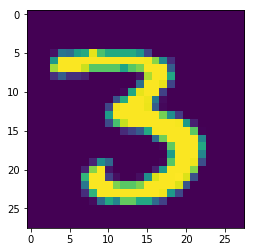

### After 5 Convolutional Layers


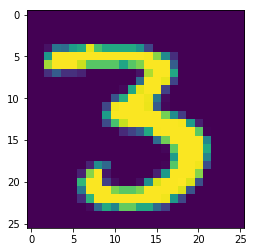

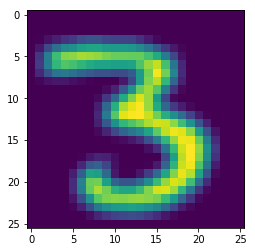

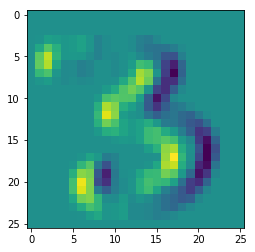

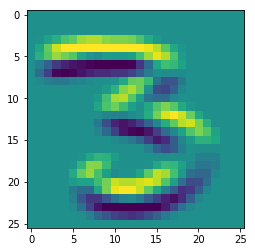

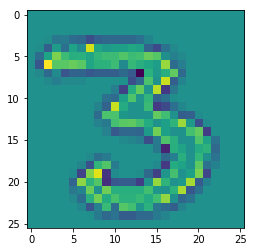

In [7]:
"""
    Real-world exmaple of 2d Convolutional Layer
"""


# Load data
mnist_train = datasets.MNIST('./data/mnist/', train = True, download = True)
x = mnist_train.train_data[12].float().view(1,1,28,28)

# Initialize the layer (filter)
f = torch.nn.Conv2d(1,5,kernel_size=3)
f.bias.data.zero_()

# Define the layer (filter)
f.weight.data[0] = Tensor([[0,0,0],
						   [0,1,0],
						   [0,0,0]])
f.weight.data[1] = Tensor([[1,1,1],
						   [1,1,1],
						   [1,1,1]])
f.weight.data[2] = Tensor([[-1,0,1],
						   [-1,0,1],
						   [-1,0,1]])
f.weight.data[3] = Tensor([[-1,-1,-1],
						   [0,0,0],
						   [1,1,1]])
f.weight.data[4] = Tensor([[0,-1,0],
						   [-1,4,-1],
						   [0,-1,0]])

# Forward
y = f(Variable(x)).data

# Print results
print('### Original Image')
plt.imshow(x[0][0])
plt.show()

print('### After 5 Convolutional Layers')
for i in range(0, 5):
    plt.imshow(y[0][i])
    plt.show()

### 5. Loss Function
```python
torch.nn.MSELoss(input, target)
```
>- input: what we predicted  
>- target: groundtruth (requires_grad must be False)  
>- output: Variable
---
- Implements the Mean Square Error loss
- $MSELoss()$ = sum of component-wise squared difference, divided by the total number of components in the tensors
- $MSELoss()$ can also be used for training classification. (By re-represent the input and target as follow). With $N = 5$ and $C = 3$:
        |2|       | -1  1 -1 |
        |1|       |  1 -1 -1 |
        |1|   →   |  1 -1 -1 |
        |3|       | -1 -1  1 |
        |2|       | -1  1 -1 |

In [8]:
"""
    Example of 'torch.nn.MSELoss'
"""


f = torch.nn.MSELoss()

x = Variable(Tensor([[3]]))
y = Variable(Tensor([[0]]))
print(f(x, y))

x = Variable(Tensor([[3, 0, 0, 0]]))
y = Variable(Tensor([[0, 0, 0, 0]]))
print(f(x, y))

tensor(9.)
tensor(2.2500)


### 6. Build up Convolutional Network:
<img width=80% src="images/4b-3.png">


### 7. Creating a Module
- Rules:
    1. Implement constructor: `__init__(self, ...)`
    2. Implement forward pass: `forward(self, x)`
- Modules & Parameters are added as attributes in `Module.parameters()`
- Add Modules & Parameter:
    1. Declare in `__init__()`
    2. `Module.add_module(name, module)`
    3. `Module.register_parameter(name, module)`
- `nn.ModuleList`:
    Use append to add Module to ModuleList

In [25]:
"""
    Example of 'Creating a Module'
"""


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(256, 200)
        self.fc2 = nn.Linear(200, 10)
        self.param = nn.Parameter(Tensor(123, 456))
        
        self.add_module('fc3', nn.Linear(54, 21))
        self.register_parameter('param2', nn.Parameter(Tensor(11, 20)))
        
        self.fc_list = nn.ModuleList()
        self.fc_list.append(nn.Linear(50, 75))
        self.fc_list.append(nn.Linear(125, 999))

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3, stride=3))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

"""
    Modules & Parameters are added as attributes in Module.parameters()
"""


model = Net()
i = 0
# for param in model.parameters():
for name, param in model.named_parameters():
    print('{}. {} - {}'.format(i, name, param.size()))
    i += 1

0. param - torch.Size([123, 456])
1. param2 - torch.Size([11, 20])
2. conv1.weight - torch.Size([32, 1, 5, 5])
3. conv1.bias - torch.Size([32])
4. conv2.weight - torch.Size([64, 32, 5, 5])
5. conv2.bias - torch.Size([64])
6. fc1.weight - torch.Size([200, 256])
7. fc1.bias - torch.Size([200])
8. fc2.weight - torch.Size([10, 200])
9. fc2.bias - torch.Size([10])
10. fc3.weight - torch.Size([21, 54])
11. fc3.bias - torch.Size([21])
12. fc_list.0.weight - torch.Size([75, 50])
13. fc_list.0.bias - torch.Size([75])
14. fc_list.1.weight - torch.Size([999, 125])
15. fc_list.1.bias - torch.Size([999])


### 8. Batch processing
- Before: $x$ is column vectors in computing $s$ process:
<img width=60% src="images/4b-4.png">

- After: convert multiple x to 1 column vector:
<img width=40% src="images/4b-5.png">
then:
<img width=20% src="images/4b-6.png">
profit: more efficient effort to perform deep learning

In [33]:
"""
    Example of Batch processing (Compared to Traditional method)
"""


def timing(x, w, nb=51):
    t = torch.FloatTensor(nb)
    
    # Batch processing
    for u in range(t.size(0)):
        t0 = time.perf_counter()
        ##
        y = x.mm(w.t())
        
        y.is_cuda and torch.cuda.synchronize()
        t[u] = time.perf_counter() - t0
    tb = t.median()
    
    # Traditional method
    for u in range(t.size(0)):
        t0 = time.perf_counter()
        ##
        for k in range(y.size(0)):
            y[k] = w.mv(x[k])

        y.is_cuda and torch.cuda.synchronize()
        t[u] = time.perf_counter() - t0
    tl = t.median()
    
    print('{} batch vs. loop speed ratio {:.01f}'
          .format((y.is_cuda and 'GPU') or 'CPU', tl / tb))

x = torch.FloatTensor(250, 100).normal_()
w = torch.FloatTensor(150, 100).normal_()
timing(x, w)

x = torch.cuda.FloatTensor(250, 100).normal_()
w = torch.cuda.FloatTensor(150, 100).normal_()
timing(x, w)

CPU batch vs. loop speed ratio 21.8
GPU batch vs. loop speed ratio 160.9
